In [2]:
import networkx as nx
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [3]:
# Reading in graph 
G0 = nx.read_weighted_edgelist("bakers_yeast.txt",comments="#",nodetype=str)

In [4]:
# Deleting edges that don't meet threshold score
threshold_score = 700
for edge in G0.edges: 
    weight = list(G0.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G0.remove_edge(edge[0],edge[1])

# Reading in essential proteins file
df = pd.read_csv("essential_proteins.csv", header=None)
essential_proteins = df[1].values

# Deleting essential proteins
for protein in essential_proteins:
  str = "4932." + protein
  if str in G0.nodes and str != "4932.YJL034W":
    G0.remove_node(str)

In [5]:
# Deleting proteins of degree zero
G0.remove_nodes_from(list(nx.isolates(G0)))

In [6]:
homologs = ["4932.YJR109C", "4932.YDL052C", "4932.YKL140W", "4932.YLL012W", "4932.YBR041W", "4932.YLR113W", "4932.YJL130C", "4932.YJL034W"]

louvain = nx.algorithms.community.louvain_communities(G0)
louvain.sort(key=len, reverse=True)

print("Number of communities: {}".format(len(louvain)))
size_of_communities = [len(community) for community in louvain]
print("Sizes of communities: ", size_of_communities)

indexes = []
for homolog in homologs:
  i = 0
  for community in louvain:
    if homolog in community:
      indexes.append(i)
      break
    i += 1 

print(list(zip(homologs, indexes)))

Number of communities: 28
Sizes of communities:  [519, 510, 510, 417, 415, 406, 306, 231, 201, 195, 180, 174, 150, 141, 135, 124, 19, 7, 7, 5, 4, 3, 2, 2, 2, 2, 2, 2]
[('4932.YJR109C', 0), ('4932.YDL052C', 9), ('4932.YKL140W', 9), ('4932.YLL012W', 9), ('4932.YBR041W', 9), ('4932.YLR113W', 2), ('4932.YJL130C', 0), ('4932.YJL034W', 1)]


In [8]:
sub = G0.subgraph(louvain[9])

louvain = nx.algorithms.community.louvain_communities(sub)
louvain.sort(key=len, reverse=True)

print("Number of communities: {}".format(len(louvain)))
size_of_communities = [len(community) for community in louvain]
print("Sizes of communities: ", size_of_communities)

indexes = []
for homolog in homologs:
  i = 0
  for community in louvain:
    if homolog in community:
      indexes.append(i)
      break
    i += 1 

print(list(zip(homologs, indexes)))

Number of communities: 9
Sizes of communities:  [66, 55, 37, 23, 21, 15, 9, 8, 3]
[('4932.YJR109C', 0), ('4932.YDL052C', 0), ('4932.YKL140W', 0), ('4932.YLL012W', 1)]


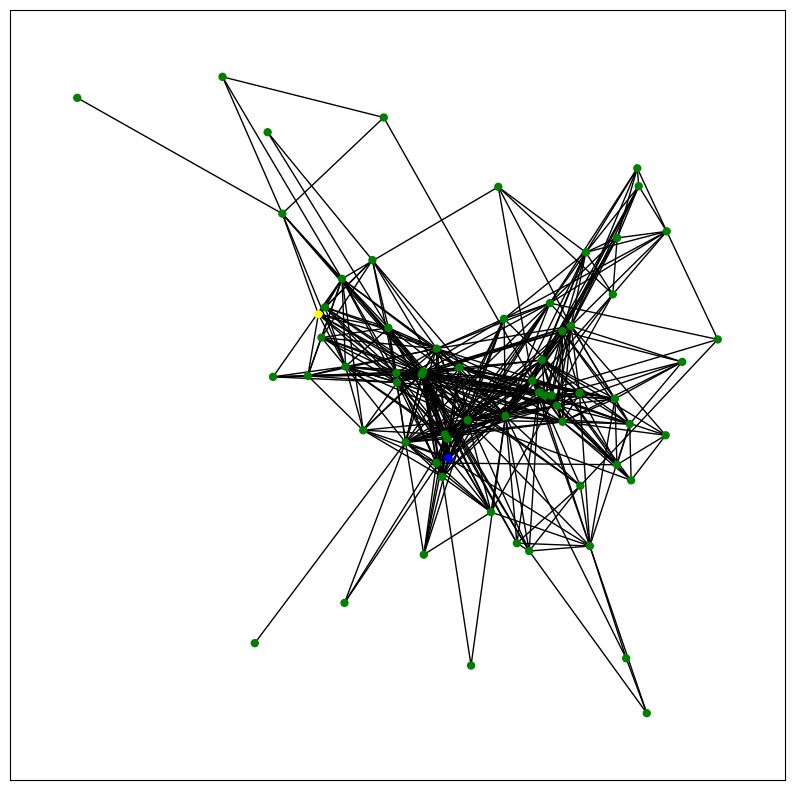

In [13]:
sub = G0.subgraph(list(louvain[0]))

color_map = []

for node in sub.nodes:
  if node == "4932.YDL052C":
    color_map.append("blue")
  elif node == "4932.YJR109C":
    color_map.append("red")
  elif node == "4932.YKL140W":
    color_map.append("yellow")
  else:
    color_map.append("green")

node_size_map = [25 if node == "4932.YDL052C" or node == "4932.YJR109C" or node == "4932.YKL140W" else 25 for node in sub.nodes]  


plt.figure(3,figsize=(10,10))
nx.draw_networkx(sub, linewidths=1, with_labels=False, node_color=color_map, node_size = node_size_map)
plt.show()